In [1]:
## Importing the CSV and creation of a dataframe "poke_df"
import pandas as pd
from matplotlib import pyplot as plt
from pokedata_imports import Plot as pokeplt
import seaborn as sns

PATH_POKEDEX_CSV = "./pokedex/pokedex.csv"
poke_df = pd.read_csv(PATH_POKEDEX_CSV)
poke_df = poke_df.drop("Unnamed: 0", axis=1)

In [2]:
## From (STATS1, 5), we learnt about the generations of Pokemon
## According to Bulbapedia: A generation (Japanese: 世代 ( せだい ) generation) is a grouping of the Pokémon games that separates them based on the Pokémon they include.
generations = poke_df["generation"].value_counts().drop_duplicates().sort_index().reset_index()
generations

,generation,count
0,1,192
1,2,107
2,3,165
3,4,121
4,5,171
5,6,85
6,7,99
7,8,88


In [3]:
## Each generation of Pokémon corresponds to a specific region. For example, the first generation comprises Pokémon from the Kanto Region.

# Assigning regions for each generations, in the format generation_no:region_name
regions_dict = {
    1: "Kanto",
    2: "Johto",
    3: "Hoenn",
    4: "Sinnoh",
    5: "Unova",
    6: "Kalos",
    7: "Alola",
    8: "Galar"
}

# Creating a dataframe "regions" from dictionary
regions = pd.DataFrame(
    data = list(regions_dict.items()),
    columns=["generation", "region"]
)

regions

,generation,region
0,1,Kanto
1,2,Johto
2,3,Hoenn
3,4,Sinnoh
4,5,Unova
5,6,Kalos
6,7,Alola
7,8,Galar


In [4]:
## Joining the regions dataframe to generations dataframe (inner join)
generations_merged = generations.merge(
    regions,
    on="generation",
    how = "inner"
)

generations_merged

,generation,count,region
0,1,192,Kanto
1,2,107,Johto
2,3,165,Hoenn
3,4,121,Sinnoh
4,5,171,Unova
5,6,85,Kalos
6,7,99,Alola
7,8,88,Galar


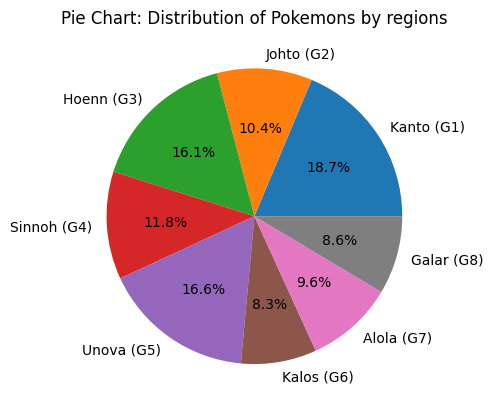

In [5]:
## Creating necessary figures to display distribution of data (Number of Pokemons)

#1 PIE CHART

title = "Pie Chart: Distribution of Pokemons by regions"
## OLD: Does not include generation number 
# region_col = generations_merged["region"]
region_col = [
    f"{region} (G{generation})" for region, generation in zip(generations_merged["region"], generations_merged["generation"])
]
count_col = generations_merged["count"]
generation_col = generations_merged["generation"]
plt.pie(
    count_col, 
    labels=region_col,
    autopct="%1.1f%%"
)
plt.title(title)
plt.show()


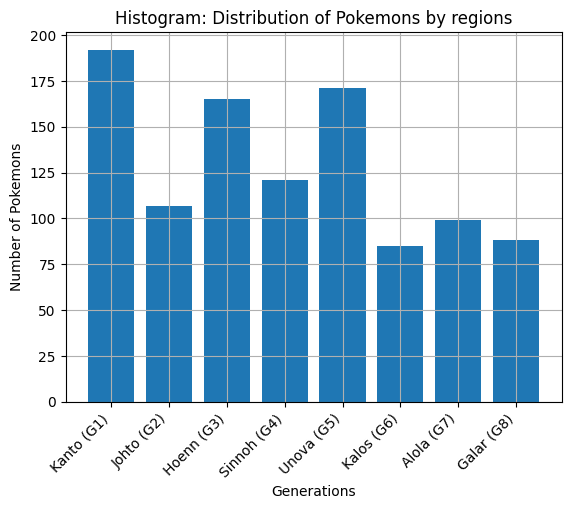

In [6]:
#2 Bar Plot
title = "Histogram: Distribution of Pokemons by regions"
plt.bar(region_col, count_col)
plt.xlabel("Generations")
plt.ylabel("Number of Pokemons")
plt.xticks(rotation=45, ha="right")
plt.title(title)
plt.grid(True)
plt.show()

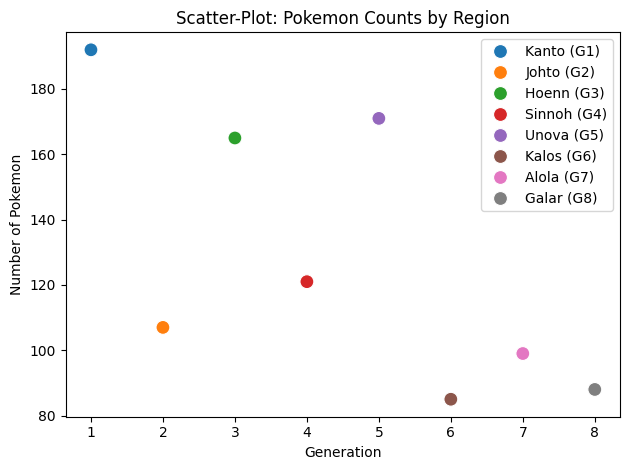

In [7]:
#3 Scatterplot may not be the best option to visualize data
sns.scatterplot(
    data=generations_merged, 
    y=count_col,
    x=generation_col,
    hue=region_col,
    s=100
)
plt.xlabel("Generation")
plt.ylabel("Number of Pokemon")
plt.title("Scatter-Plot: Pokemon Counts by Region")
plt.tight_layout()
plt.show()


In [8]:
## Each generations has 3 Starter Pokemons (a player is only able to obtain one starter Pokemon)
## There are 3 primary types to choose from: Grass, Water and Fire

# (1) Extracting the Starter Pokemon for each generation
# Pokemons are grouped by their generations and the minimum pokedex_number is extracted using min() function
pokedex_number_starters = poke_df.groupby("generation")["pokedex_number"].min()
pokedex_number_starters

generation
1      1
2    152
3    252
4    387
5    494
6    650
7    722
8    810
Name: pokedex_number, dtype: int64

In [9]:
# (2) Each starter Pokémon evolves in 3 stages.
# The stages are listed in such a way that the Pokédex number followed is for the next stage.
# The final stage of one Pokemon is followed by the starting stage of another Pokemon
# Example: Bulbasaur(1) -> Ivysaur(2) -> Venusaur(3) -> Squirtle(4).
# Some starter Pokémon have a Mega Evolution, a temporary evolution, which shares the same Pokédex Number.

# Implementation in Python to store the list of starters in a dict
# Converting this to a Python function as it will be easier for other evolutions of starters

def find_all_starters(starter_level:int=1, start_gen = 0, end_gen = 8):
    # There are only three evolutions for a starter: Starting, Middle and Final
    if starter_level >=1 and starter_level <= 3:
        starters = {}
        for gen, pokedex in pokedex_number_starters.items():
            starter_list = []

            # In Generation V, the Pokedex starts from Victini. However, Victini is not a starter Pokemon. So the starting index must be shifted by 1
            pokedex = pokedex+1 if gen == 5 else pokedex
            
            for c in range(-1+starter_level, 6+starter_level, 3):
                starter = poke_df.name[poke_df["pokedex_number"] == pokedex+c].iloc[0]
                starter_list.append(starter)
            starters[gen] = starter_list

        starter_pokemon = pd.DataFrame(starters, index=["Grass", "Fire", "Water"])
        return starter_pokemon.iloc[:, start_gen:end_gen]
    else:
        return None


In [10]:
# (2) All the evolutions of starter Pokemon can be extracted as
# (2A) Starting Evolution
find_all_starters(starter_level=1)

,1,2,3,4,5,6,7,8
Grass,Bulbasaur,Chikorita,Treecko,Turtwig,Snivy,Chespin,Rowlet,Grookey
Fire,Charmander,Cyndaquil,Torchic,Chimchar,Tepig,Fennekin,Litten,Scorbunny
Water,Squirtle,Totodile,Mudkip,Piplup,Oshawott,Froakie,Popplio,Sobble


In [11]:
# (2B) Middle Evolution
find_all_starters(starter_level=2)

,1,2,3,4,5,6,7,8
Grass,Ivysaur,Bayleef,Grovyle,Grotle,Servine,Quilladin,Dartrix,Thwackey
Fire,Charmeleon,Quilava,Combusken,Monferno,Pignite,Braixen,Torracat,Raboot
Water,Wartortle,Croconaw,Marshtomp,Prinplup,Dewott,Frogadier,Brionne,Drizzile


In [12]:
# (2C) Final Evolution
find_all_starters(starter_level=3)

,1,2,3,4,5,6,7,8
Grass,Venusaur,Meganium,Sceptile,Torterra,Serperior,Chesnaught,Decidueye,Rillaboom
Fire,Charizard,Typhlosion,Blaziken,Infernape,Emboar,Delphox,Incineroar,Cinderace
Water,Blastoise,Feraligatr,Swampert,Empoleon,Samurott,Greninja,Primarina,Inteleon


In [13]:
# (3) Creating an extended function to find the exact starter using generation_number, type, evolution phase
# The default arguments are set for Bulbasaur (Gen1, 'Grass', 1)
def find_starter(generation:int=1, pokemon_type:str='Grass', starter_level=1):
    starter_by_gen = find_all_starters(
        starter_level=starter_level,
        start_gen=generation-1,
        end_gen=generation
    )
    return starter_by_gen.loc[pokemon_type, generation]

# (3A) Extracting Typholsion from Gen 2 (one of my favorite Pokemons)
starter_fire_3_gen2 = find_starter(starter_level=3, pokemon_type='Fire', generation=2)
print(f"My favorite Fire Type Pokemon is {starter_fire_3_gen2}.")

# (3B) Extracting all evolutions of Froakie from Gen 6 (we still love Greninja from XY Series)
print(f"{find_starter(6, 'Water', 1)} evolves into {find_starter(6, 'Water', 2)}, which finally evolves into {find_starter(6, 'Water', 3)}.")

# (3C) The above command gave me an idea to create a simple info about the evolution line by typing
def show_evolution(generation:int=1, pokemon_type:str="Grass"):
    print(f"Generation: {generation}\n{pokemon_type} type starter")
    print(f"{find_starter(generation, pokemon_type, 1)} -> {find_starter(generation, pokemon_type, 2)} -> {find_starter(generation, pokemon_type, 3)}")

print()
show_evolution(3, "Water")

My favorite Fire Type Pokemon is Typhlosion.
Froakie evolves into Frogadier, which finally evolves into Greninja.

Generation: 3
Water type starter
Mudkip -> Marshtomp -> Swampert
